## Following Models are Implemented:
1. Logistic Regression
2. SVM
3. Random Forest
4. k Nearest Neighbor
5. Decision Tree
6. AdaBoost Classifier
7. XG Boost
8. Gaussian NB


## Required libraries

In [24]:
# !pip install xgboost
# !pip install graphviz
# !python -m pip install plotly
# !pip install --upgrade nbformat
# !pip install mlxtend
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9d743630ab62ba4798c07c4e86d338ceb25d70ccee019038347e2a26bcdb2235
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.4 MB/s eta 0:00:00


# Importing Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
# import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTETomek
#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
# import shap

# Importing Dataset

In [3]:
#Dataset
proc_data = pd.read_csv("resampled_data.csv")
proc_data.head()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,1,4,2,2,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93,1
1,2,4,2,2,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07,1
2,0,4,4,2,0.0,22.0,3.0,5,5,2,22.0,4.0,6.0,7.0,139.19,1
3,1,4,0,2,11.0,6.0,3.0,4,3,10,13.0,0.0,1.0,0.0,153.81,1
4,2,1,3,2,0.0,11.0,2.0,3,3,2,13.0,2.0,2.0,2.0,134.41,1


# Implementing Models

In [4]:

y = proc_data['Churn']
X = proc_data.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4047, 15), (1735, 15), (4047,), (1735,))

# Scaling

In [5]:

Scaler = MinMaxScaler()
x_train_scaled = Scaler.fit_transform(X_train)
x_test_scaled = Scaler.fit_transform(X_test)

# Implementing Models

In [36]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVM':SVC(),
    'Random Forest':RandomForestClassifier(),
    'K Nearest Neighbor':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'AdaBoost Classifier':AdaBoostClassifier(),
    'XG boost':XGBClassifier(),
    'GaussianNB':GaussianNB()
}

## Fit models

In [38]:
evaluation_metrics = []

for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)

    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    metrics_dict = {
        'Model Name': model_name,
        'Accuracy on train data': accuracy_score(y_train, y_pred_train),
        'Accuracy on test data': accuracy_score(y_test, y_pred_test),
        'Precision on train data': precision_score(y_train, y_pred_train),
        'Precision on test data': precision_score(y_test, y_pred_test),
        'Recall on train data': recall_score(y_train, y_pred_train),
        'Recall on test data': recall_score(y_test, y_pred_test),
        'F1-score on train data': f1_score(y_train, y_pred_train),
        'F1-score on test data': f1_score(y_test, y_pred_test),
        'Confusion Matrix on train data': confusion_matrix(y_train, y_pred_train),
        'Confusion Matrix on test data': confusion_matrix(y_test, y_pred_test)
    }

    evaluation_metrics.append(metrics_dict)

for metrics in evaluation_metrics:
    print(metrics)
    print()

{'Model Name': 'Logistic Regression', 'Accuracy on train data': 0.7793427230046949, 'Accuracy on test data': 0.7769452449567723, 'Precision on train data': 0.7520952801058668, 'Precision on test data': 0.7494669509594882, 'Recall on train data': 0.837426326129666, 'Recall on test data': 0.8222222222222222, 'F1-score on train data': 0.7924703695096446, 'F1-score on test data': 0.7841606246514221, 'Confusion Matrix on train data': array([[1449,  562],
       [ 331, 1705]]), 'Confusion Matrix on test data': array([[645, 235],
       [152, 703]])}

{'Model Name': 'SVM', 'Accuracy on train data': 0.8796639486039042, 'Accuracy on test data': 0.854178674351585, 'Precision on train data': 0.8627634660421546, 'Precision on test data': 0.8374439461883408, 'Recall on train data': 0.9047151277013753, 'Recall on test data': 0.8736842105263158, 'F1-score on train data': 0.8832414289139295, 'F1-score on test data': 0.8551803091013165, 'Confusion Matrix on train data': array([[1718,  293],
       [ 19

## Results of models

In [8]:
Evaluation_df = pd.DataFrame(evaluation_metrics)
Evaluation_df

,Model Name,Accuracy on train data,Accuracy on test data,Precision on train data,Precision on test data,Recall on train data,Recall on test data,F1-score on train data,F1-score on test data,Confusion Matrix on train data,Confusion Matrix on test data
0,Logistic Regression,0.779343,0.776945,0.752095,0.749467,0.837426,0.822222,0.792470,0.784161,"[[1449, 562], [331, 1705]]","[[645, 235], [152, 703]]"
1,SVM,0.879664,0.854179,0.862763,0.837444,0.904715,0.873684,0.883241,0.855180,"[[1718, 293], [194, 1842]]","[[735, 145], [108, 747]]"
2,Random Forest,1.000000,0.963689,1.000000,0.947964,1.000000,0.980117,1.000000,0.963772,"[[2011, 0], [0, 2036]]","[[834, 46], [17, 838]]"
3,K Nearest Neighbor,0.916976,0.865130,0.866064,0.798845,0.987721,0.970760,0.922900,0.876452,"[[1700, 311], [25, 2011]]","[[671, 209], [25, 830]]"
4,Decision Tree,1.000000,0.916427,1.000000,0.881720,1.000000,0.959064,1.000000,0.918768,"[[2011, 0], [0, 2036]]","[[770, 110], [35, 820]]"
5,AdaBoost Classifier,0.885594,0.819597,0.884221,0.764133,0.888998,0.916959,0.886603,0.833599,"[[1774, 237], [226, 1810]]","[[638, 242], [71, 784]]"
6,XG boost,1.000000,0.941787,1.000000,0.905376,1.000000,0.984795,1.000000,0.943417,"[[2011, 0], [0, 2036]]","[[792, 88], [13, 842]]"
7,GaussianNB,0.702743,0.704899,0.680537,0.681098,0.771120,0.754386,0.723003,0.715871,"[[1274, 737], [466, 1570]]","[[578, 302], [210, 645]]"


## Ploting Confusion matrices

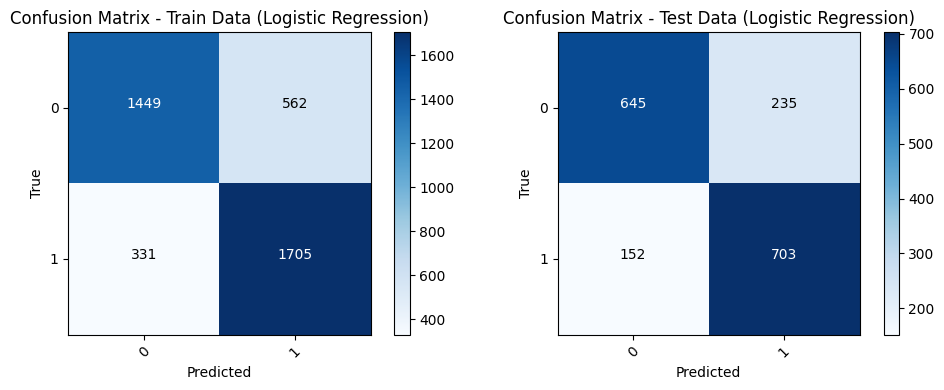

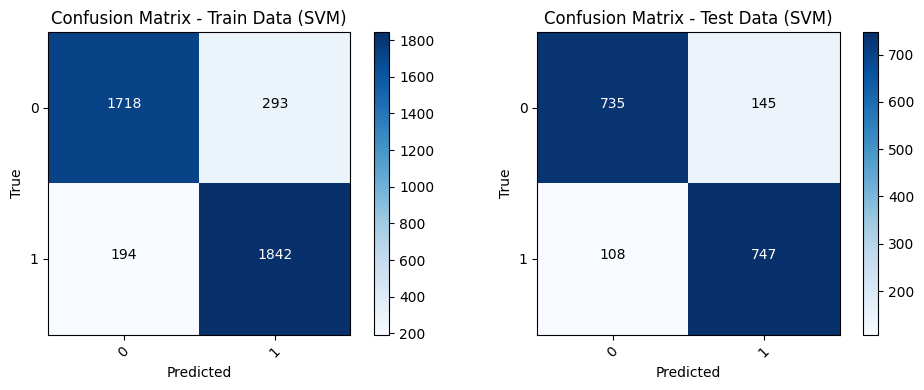

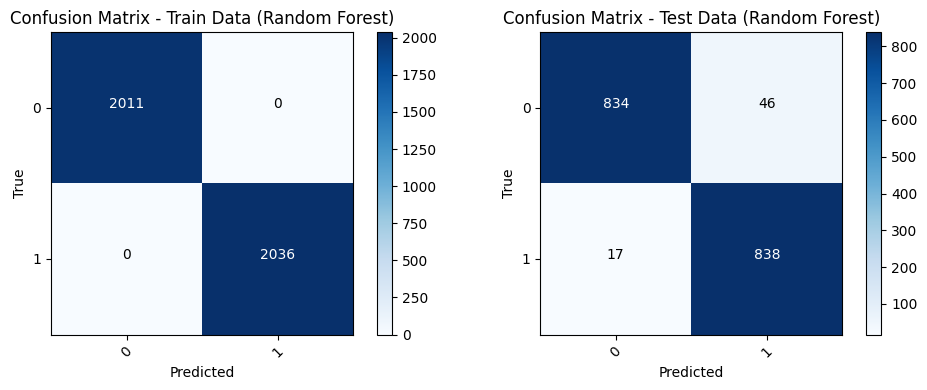

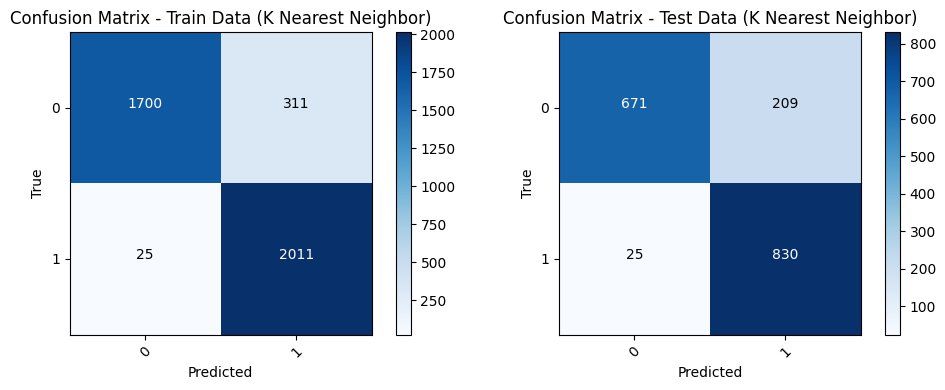

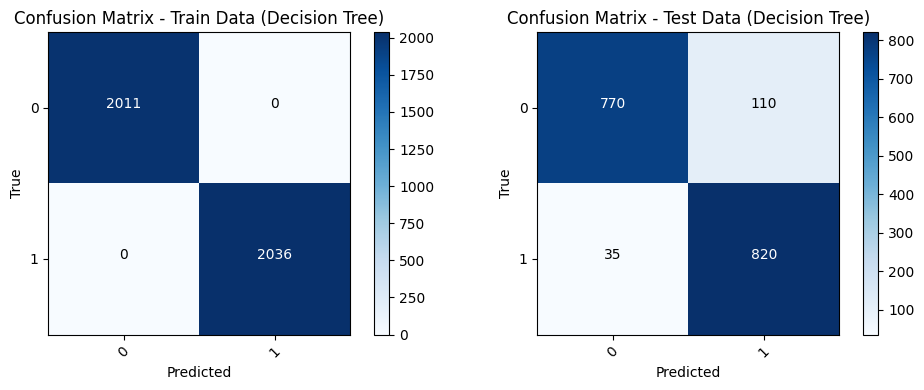

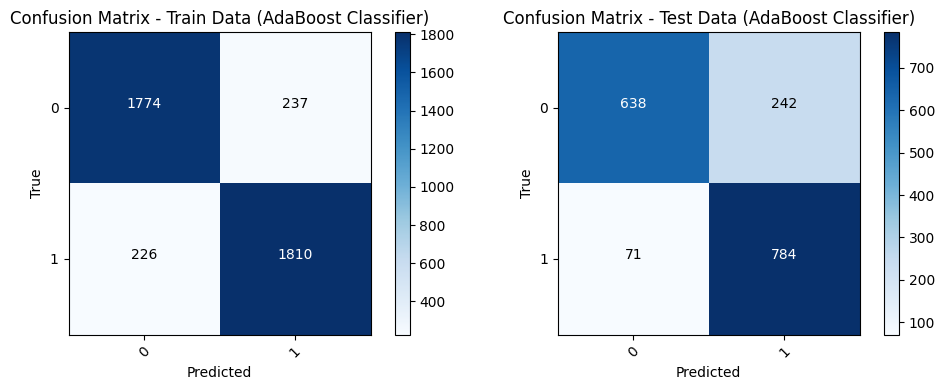

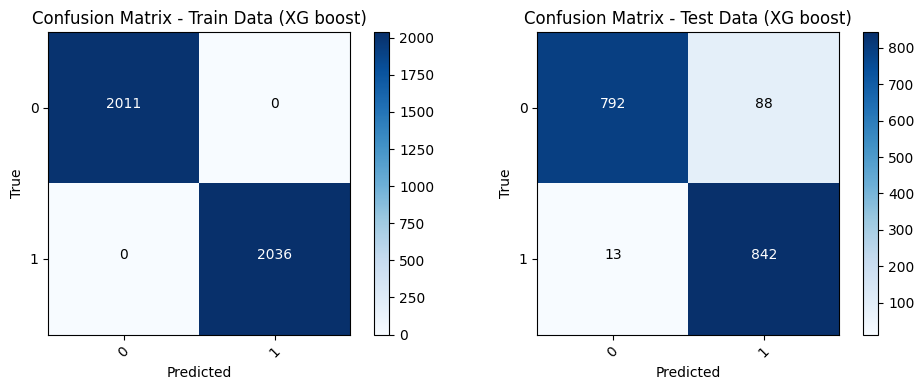

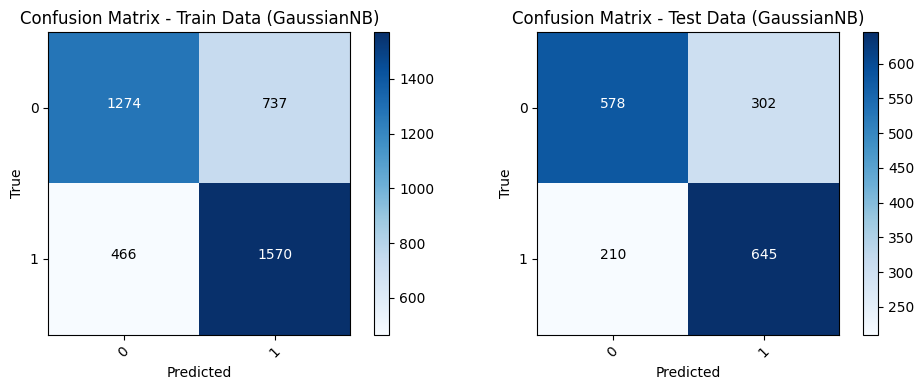

In [9]:


for index, row in Evaluation_df.iterrows():
    model_name = row['Model Name']
    cm_train = row['Confusion Matrix on train data']
    cm_test = row['Confusion Matrix on test data']

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(f'Confusion Matrix - Train Data ({model_name})')
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    tick_marks = np.arange(len(cm_train))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.xticks(rotation=45)
    for i in range(len(cm_train)):
        for j in range(len(cm_train)):
            plt.text(j, i, str(cm_train[i][j]), horizontalalignment="center", color="white" if cm_train[i, j] > (cm_train.max() / 2) else "black")

    plt.subplot(1, 2, 2)
    plt.title(f'Confusion Matrix - Test Data ({model_name})')
    plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    tick_marks = np.arange(len(cm_test))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.xticks(rotation=45)
    for i in range(len(cm_test)):
        for j in range(len(cm_test)):
            plt.text(j, i, str(cm_test[i][j]), horizontalalignment="center", color="white" if cm_test[i, j] > (cm_test.max() / 2) else "black")

    plt.show()


# Ranking models based on evaluation metrics

In [10]:
df_sorted = Evaluation_df.sort_values(by='Accuracy on test data', ascending=False)
print(df_sorted[['Model Name', 'Accuracy on test data']])

            Model Name  Accuracy on test data
2        Random Forest               0.963689
6             XG boost               0.941787
4        Decision Tree               0.916427
3   K Nearest Neighbor               0.865130
1                  SVM               0.854179
5  AdaBoost Classifier               0.819597
0  Logistic Regression               0.776945
7           GaussianNB               0.704899


In [11]:
import plotly.express as px

# Melting the DataFrame to have a tidy format for visualization
df_melted = df_sorted.melt(id_vars='Model Name', value_vars=['Accuracy on train data', 'Accuracy on test data',
                                                             'Precision on train data', 'Precision on test data',
                                                             'Recall on train data', 'Recall on test data',
                                                             'F1-score on train data', 'F1-score on test data'],
                           var_name='Metric', value_name='Score')

# Creating a grouped bar chart
fig = px.bar(df_melted, x='Model Name', y='Score', color='Metric',
             barmode='group', title='Performance Metrics Comparison by Model',
             labels={'Score': 'Score', 'Model Name': 'Model', 'Metric': 'Metric'})

fig.show()


### Result of models:
     As we can see from the above bar plot that the Best performance and accuracy is given by random Forest Classifier model therefore, It is a good approach to use GridSearchCV and feature importance based on this model

## Feature Importance

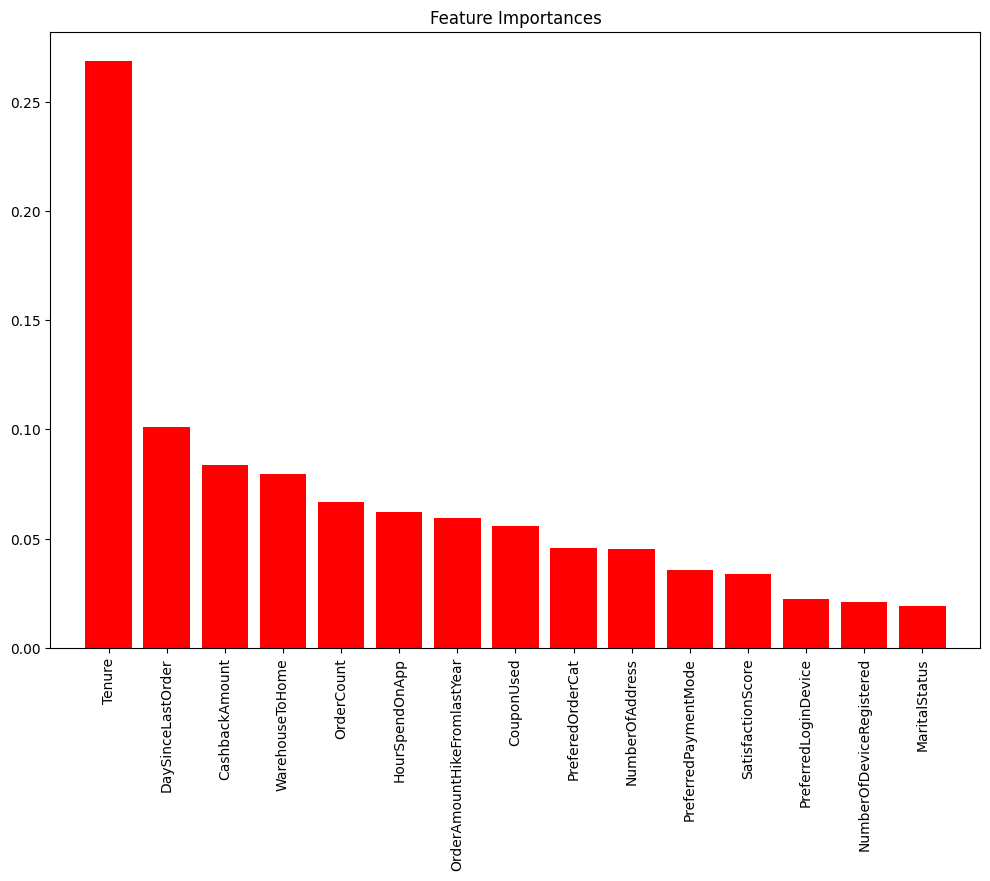

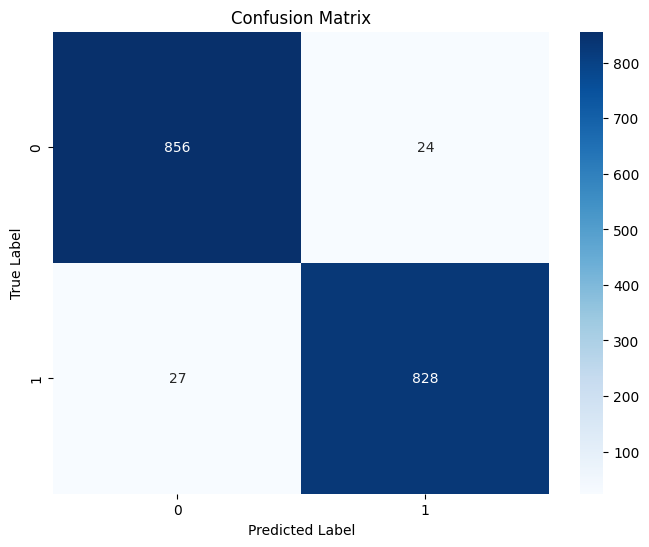

In [12]:

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
#plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Advanced Tree plot visualization for Random Forest

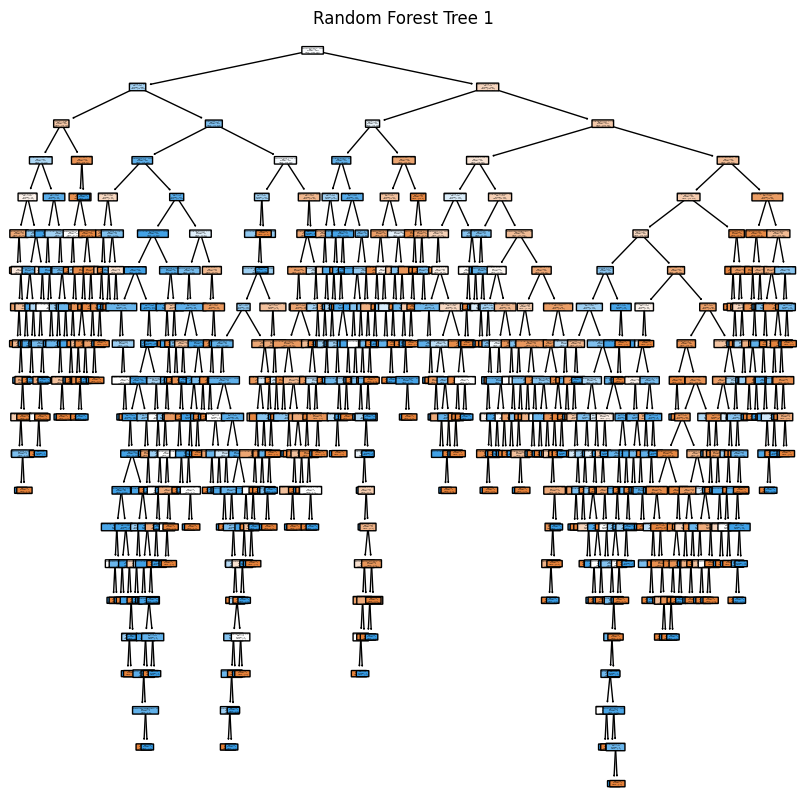

KeyboardInterrupt: 

In [13]:
from sklearn import tree

# Visualizing individual decision trees
for i in range(3):  # Visualize first 3 trees
    plt.figure(figsize=(10, 10))
    tree.plot_tree(rf_model.estimators_[i], feature_names=X.columns, class_names=['Not Churned', 'Churned'],
                   filled=True, rounded=True)
    plt.title(f"Random Forest Tree {i+1}")
    plt.savefig(f"rf_tree_{i}.png")
    plt.show()


## GRID SEARCH CV With k fold cross validation on Random Classifier and Adaboost

In [14]:


# Initialize models with default parameters
rf_model = RandomForestClassifier()

# Perform grid search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-2,
    scoring='roc_auc',
    verbose=2
)
rf_grid_search.fit(x_train_scaled, y_train)

# Perform grid search for XGBoost
xg_model = XGBClassifier()

xg_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0] # Learning rate
}

xg_grid_search = GridSearchCV(
    estimator=xg_model,
    param_grid=xg_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), #K cross validation
    n_jobs=-1,
    scoring='roc_auc',
    verbose=2
)
xg_grid_search.fit(x_train_scaled, y_train)

best_rf_params = rf_grid_search.best_params_
best_xg_params = xg_grid_search.best_params_

rf_model.set_params(**best_rf_params)
xg_model.set_params(**best_xg_params)

ensemble_models = [
    ("Random Forest", rf_model),
    ("XG Boost", xg_model)
]

# Train ensemble models
for name, model in ensemble_models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_dep

## Feature importance based on Grid Search

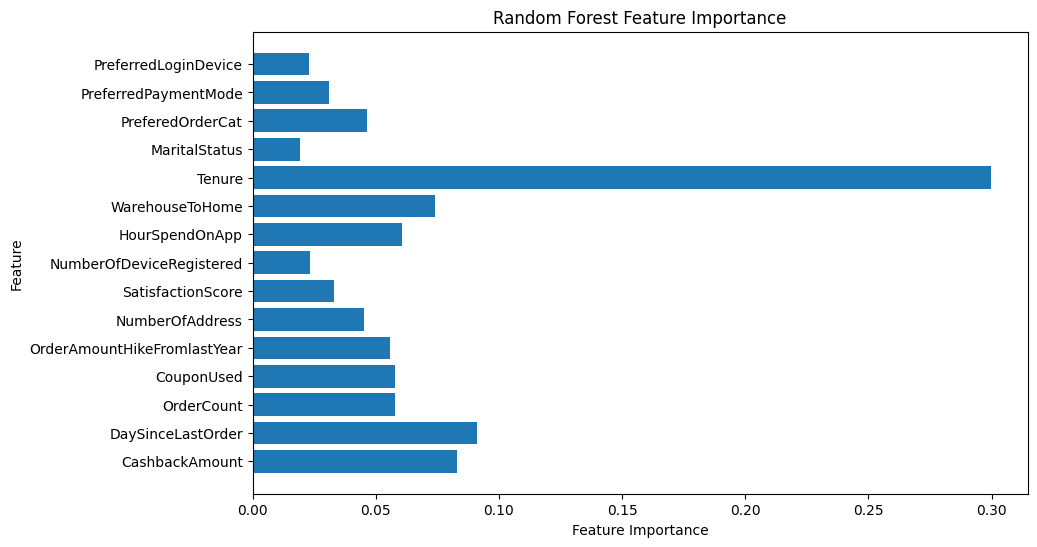

In [15]:

rf_feature_importances = rf_model.feature_importances_

feature_names = list(proc_data.columns)

num_features = min(len(feature_names), len(rf_feature_importances))

plt.figure(figsize=(10, 6))
plt.barh(feature_names[:num_features], rf_feature_importances[:num_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()



### Result:
    We have seen that Random Forst gives 96.3 percent accuracy on default parameters and 97 percent with grid search cv using k cross validation where k is 5.
    
    Random Forest default accuracy = 96.3%
    Random Forest with GridSearch = 97%

## DEEP NEURAL NETWORK (ANN)

In [19]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
127/127 [==============================] - 3s 5ms/step - loss: 4.4743 - accuracy: 0.4967
Epoch 2/10
127/127 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 3/10
127/127 [==============================] - 1s 5ms/step - loss: 0.6898 - accuracy: 0.5115
Epoch 4/10
127/127 [==============================] - 1s 7ms/step - loss: 0.6888 - accuracy: 0.5112
Epoch 5/10
127/127 [==============================] - 1s 6ms/step - loss: 0.6837 - accuracy: 0.5145
Epoch 6/10
127/127 [==============================] - 1s 6ms/step - loss: 0.6411 - accuracy: 0.5888
Epoch 7/10
127/127 [==============================] - 1s 5ms/step - loss: 0.6001 - accuracy: 0.7366
Epoch 8/10
127/127 [==============================] - 1s 5ms/step - loss: 0.5778 - accuracy: 0.7660
Epoch 9/10
127/127 [==============================] - 1s 4ms/step - loss: 0.5626 - accuracy: 0.7751
Epoch 10/10
127/127 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7801

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


55/55 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7527
Test Loss: 0.5576
Test Accuracy: 0.7527


## Overall Result:
> ### Result of models:
     As we can see from the above bar plot that the Best performance and accuracy is given by random Forest Classifier model therefore, It is a good approach to use GridSearchCV and feature importance based on this model
> ### Result of ANN:
    We have seen that ANN gives an accuracy i.e 81.07 % , this is due to limited data of 5762 rows 4047 for trainignng and 1715 for testing . But apart from this Random Forest has given around 97 percent accuracy.